<a href="https://colab.research.google.com/github/youssefkamil/Coloring-B-W-images-of-humans-face/blob/main/Coloring_B%26W_images_of_humans_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
from skimage.color import rgb2gray
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import Model, load_model,Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Dense, UpSampling2D, RepeatVector, Reshape
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

Using TensorFlow backend.


In [ ]:
import os
import zipfile

local_zip = '/content/drive/My Drive/crop_part1.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/data')
zip_ref.close()

In [ ]:
trainIm = os.listdir('/tmp/data/crop_part1')
print(trainIm[:10])
print('total training images:', len(os.listdir('/tmp/data/crop_part1')))
print('total training images:', (trainIm[1] ))


['data (3860).jpg', 'data (3843).jpg', 'data (4801).jpg', 'data (5947).jpg', 'data (4997).jpg', 'data (6677).jpg', 'data (3375).jpg', 'data (3835).jpg', 'data (1081).jpg', 'data (5222).jpg']
total training images: 6868
total training images: data (3843).jpg


In [ ]:
data=[]
datagray=[]
dataTest=[]
dataGrayTest=[]
nIm=5000
dirs=os.listdir('/tmp/data/crop_part1')
img_Bdir='/tmp/data/crop_part1/'
i=0
for name in dirs:

  if name != 'Untitled.m' and name != 'resizing.m' and name != 'myImage.jpg' and name != 'ss.jpg' and i<nIm : 
    img_dir= img_Bdir  + name
    img = plt.imread(img_dir)
    datagray.append(rgb2gray(img))
    data.append(img)
  if name != 'Untitled.m' and name != 'resizing.m' and name != 'myImage.jpg' and name != 'ss.jpg' and i>nIm :
    img_dir= img_Bdir  + name
    img = plt.imread(img_dir)
    dataGrayTest.append(rgb2gray(img))
    dataTest.append(img)
  i=i+1



In [ ]:
data=np.array(data)
data=data/255
datagray=np.array(datagray)
datagray=datagray/255
dataTest=np.array(dataTest)
dataTest=dataTest/255
dataGrayTest=np.array(dataGrayTest)
dataGrayTest=dataGrayTest/255

In [ ]:
print(data[1].shape)
print(data.shape)
print(datagray[1].shape)
datagray= np.reshape(datagray,(nIm-4 ,200,200,1))
dataGrayTest= np.reshape(dataGrayTest,(6867-nIm ,200,200,1))
print(datagray.shape)
print(dataTest[1].shape)
print(dataTest.shape)
print(dataGrayTest[1].shape)
print(dataGrayTest.shape)

(200, 200, 3)
(4996, 200, 200, 3)
(200, 200)
(4996, 200, 200, 1)
(200, 200, 3)
(1867, 200, 200, 3)
(200, 200, 1)
(1867, 200, 200, 1)


In [ ]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding='same',strides=1 , input_shape=(200, 200,1)),
    tf.keras.layers.MaxPool2D((2, 2), padding='same'),
    tf.keras.layers.Conv2D(128, (4,4), activation='relu', padding='same'),
    tf.keras.layers. Conv2D(128, (3,3), activation='relu', padding='same',strides=1),
    tf.keras.layers.MaxPool2D((2, 2), padding='same'),
    tf.keras.layers.Conv2D(256, (4,4), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same',strides=1),
    tf.keras.layers.MaxPool2D((2, 2), padding='same'),
    tf.keras.layers.Conv2D(256, (4,4), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.UpSampling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.UpSampling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (4,4), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(32, (2,2), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(3, (3,3), activation='tanh', padding='same'),
    tf.keras.layers.UpSampling2D((2, 2))
     ])
adam=keras.optimizers.Adam() 
# Compile Model. 
history=model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 128)     1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 128)     262272    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 128)     147584    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 100, 256)     524544    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 100, 100, 256)     590080    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 256)       0

In [ ]:
model = tf.keras.models.load_model('/content/drive/My Drive/bestmodel04.h5')

In [ ]:
model.fit(datagray,data, epochs=50, batch_size=120,shuffle=True )
model.save('/content/drive/My Drive/bestmodel04.h5')


Epoch 1/50
42/42 [==============================] - 62s 1s/step - loss: 0.0191 - accuracy: 0.9287
Epoch 2/50
42/42 [==============================] - 62s 1s/step - loss: 0.0038 - accuracy: 0.9357
Epoch 3/50
42/42 [==============================] - 62s 1s/step - loss: 0.0035 - accuracy: 0.9344
Epoch 4/50
42/42 [==============================] - 62s 1s/step - loss: 0.0037 - accuracy: 0.9355
Epoch 5/50
42/42 [==============================] - 62s 1s/step - loss: 0.0035 - accuracy: 0.9348
Epoch 6/50
42/42 [==============================] - 62s 1s/step - loss: 0.0035 - accuracy: 0.9351
Epoch 7/50
42/42 [==============================] - 62s 1s/step - loss: 0.0035 - accuracy: 0.9352
Epoch 8/50
42/42 [==============================] - 62s 1s/step - loss: 0.0033 - accuracy: 0.9343
Epoch 9/50
42/42 [==============================] - 62s 1s/step - loss: 0.0036 - accuracy: 0.9346
Epoch 10/50
42/42 [==============================] - 62s 1s/step - loss: 0.0034 - accuracy: 0.9345
Epoch 11/50
42/42 [

KeyboardInterrupt: ignored

In [ ]:
model.save('/content/drive/My Drive/bestmodel04.h5')

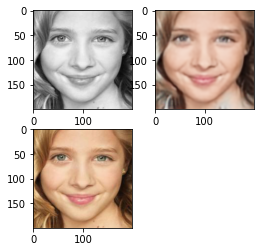

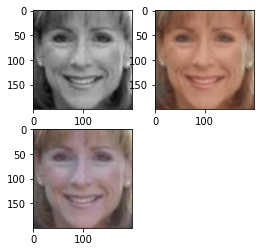

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


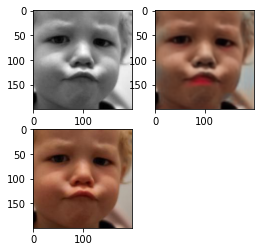

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


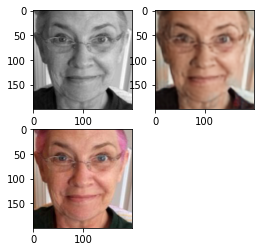

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


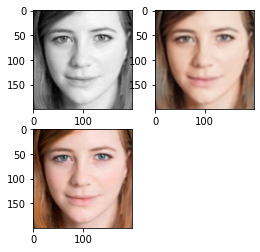

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


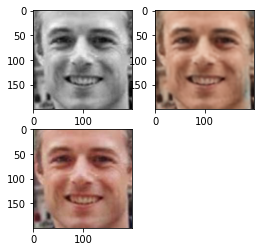

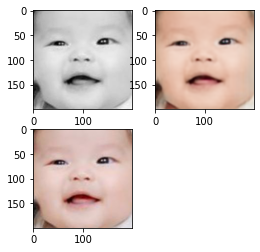

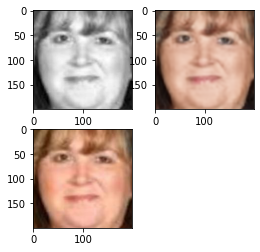

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


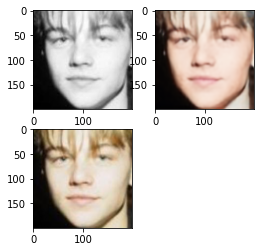

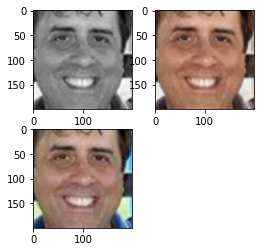

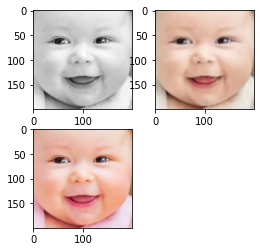

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


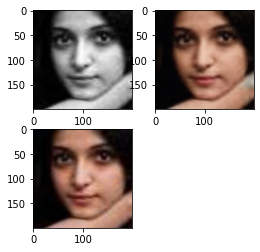

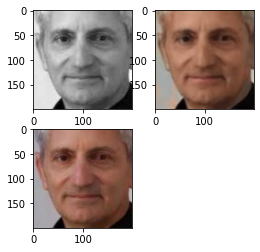

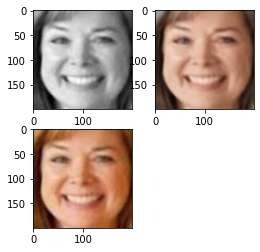

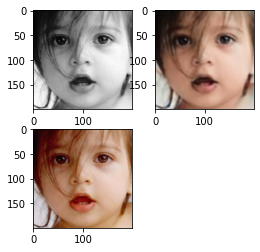

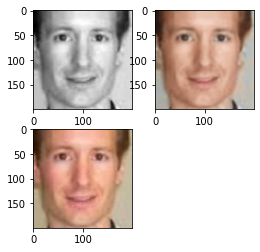

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


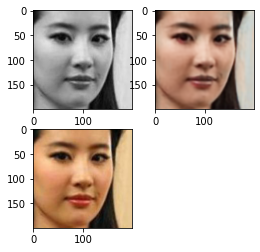

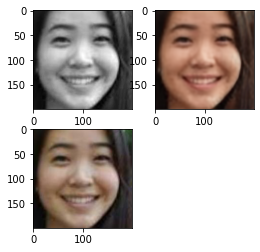

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


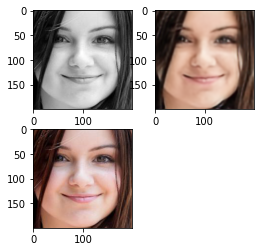

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


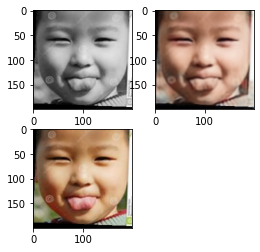

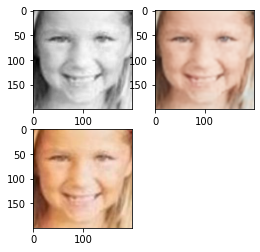

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


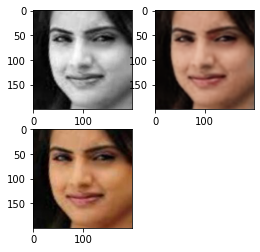

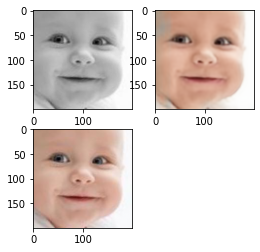

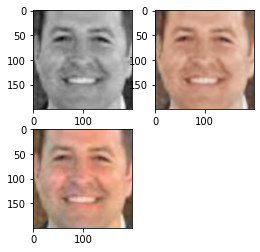

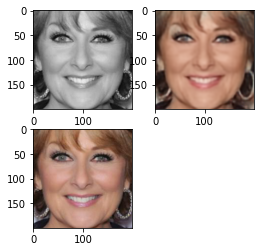

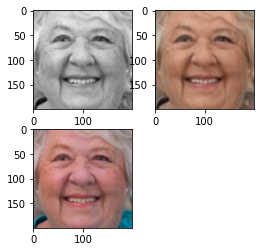

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


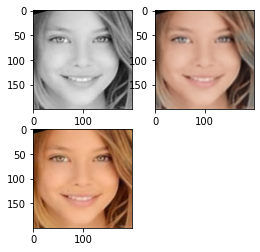

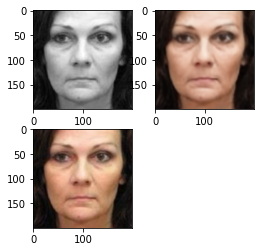

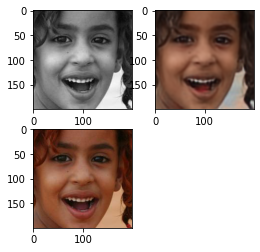

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


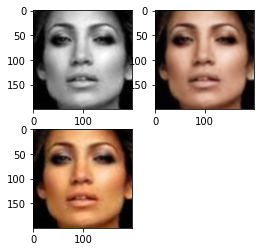

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


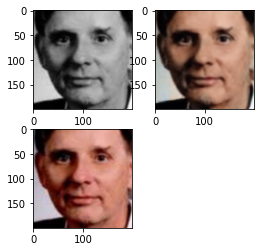

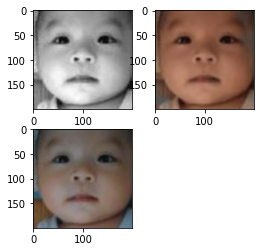

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


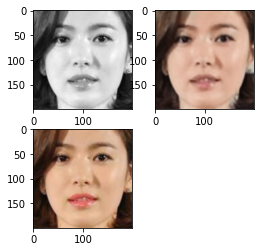

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


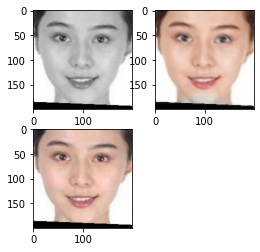

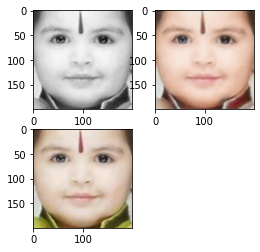

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


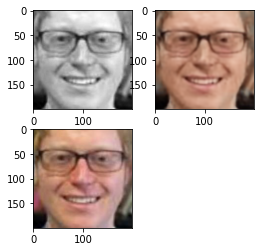

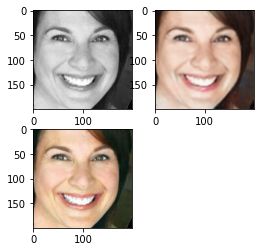

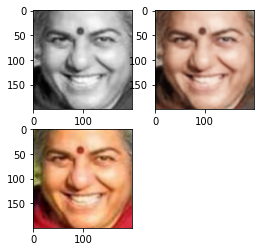

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


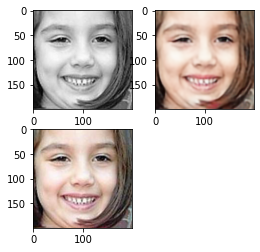

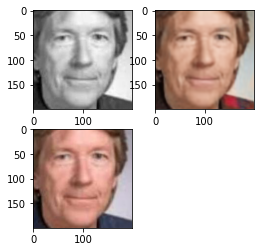

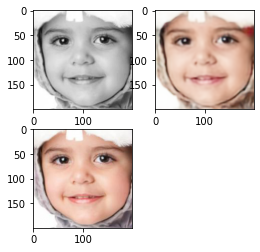

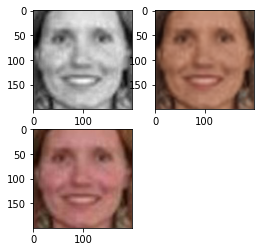

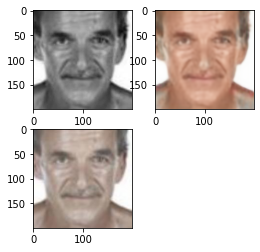

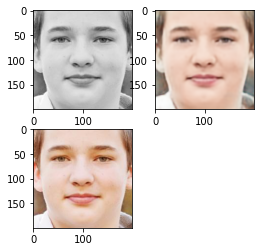

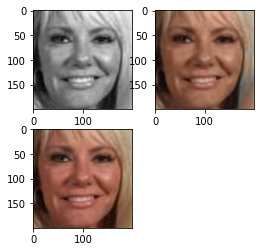

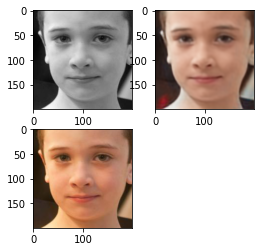

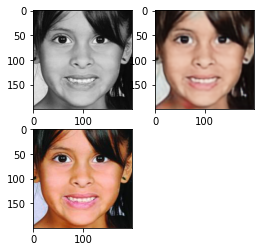

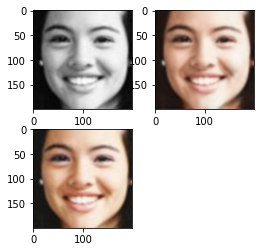

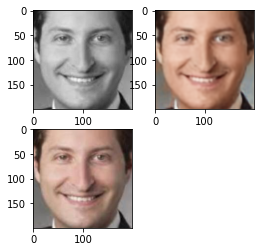

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


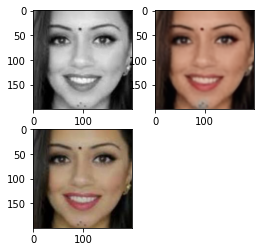

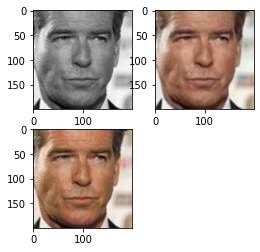

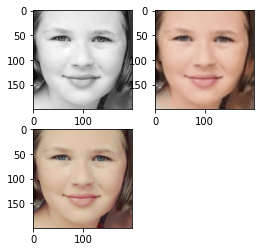

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


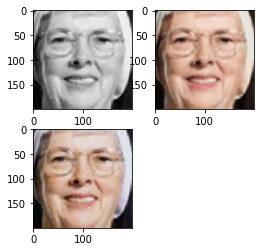

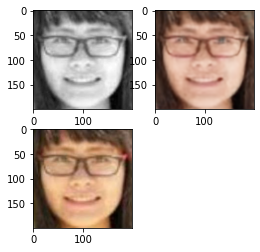

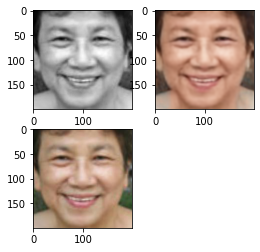

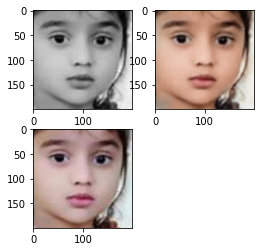

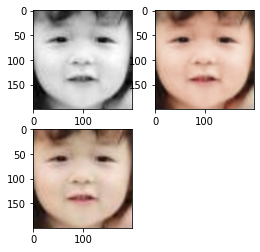

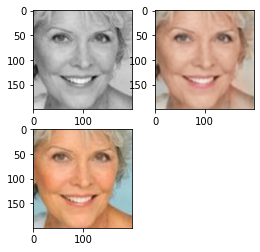

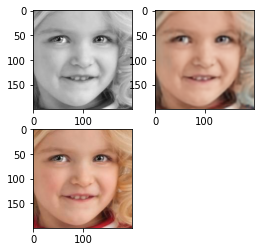

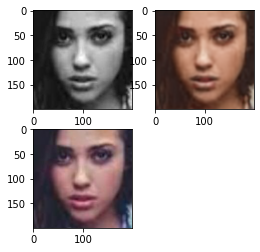

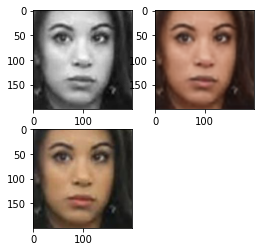

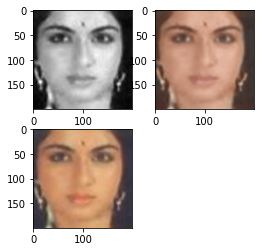

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


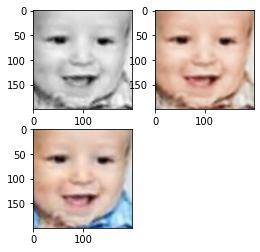

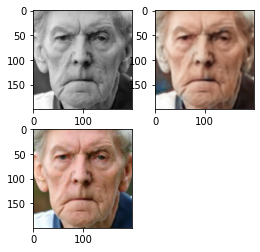

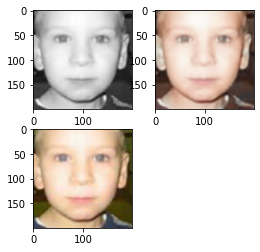

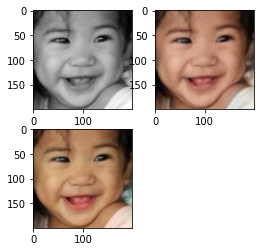

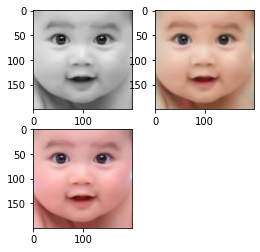

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


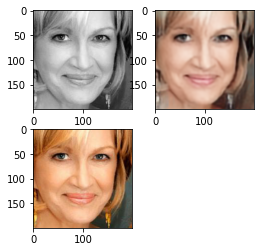

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


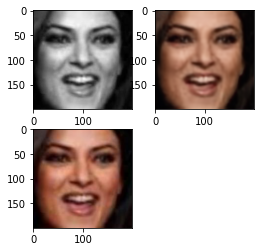

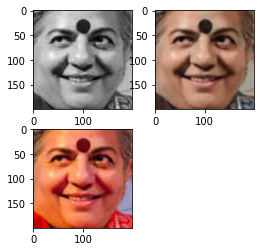

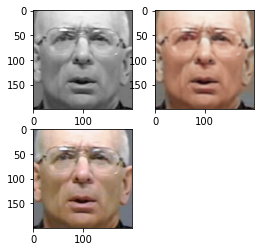

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


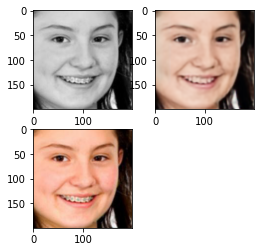

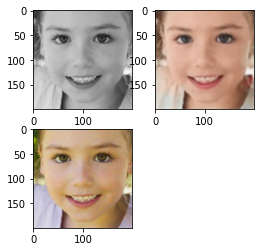

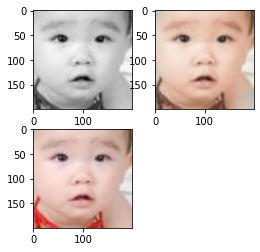

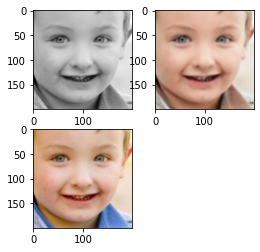

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


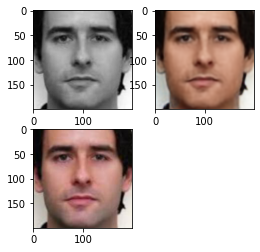

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


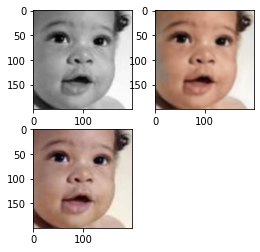

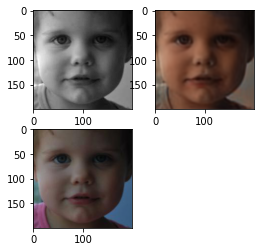

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


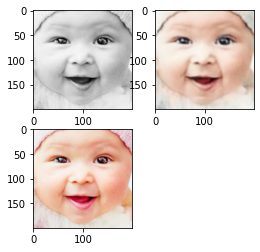

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


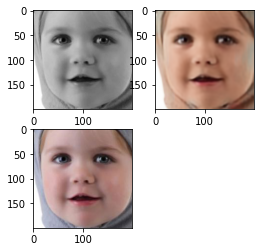

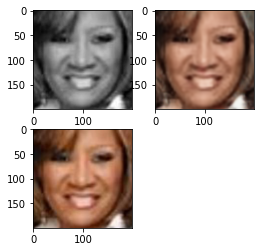

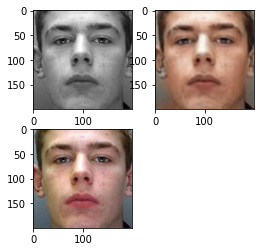

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


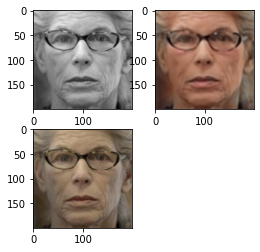

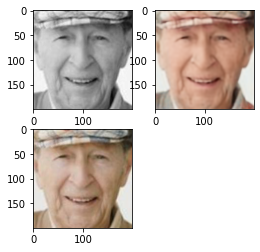

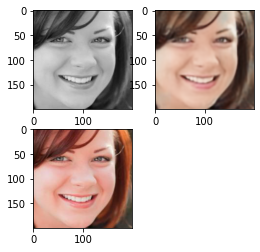

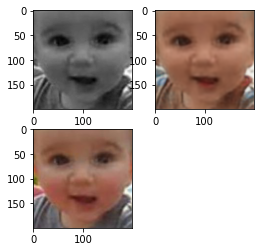

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


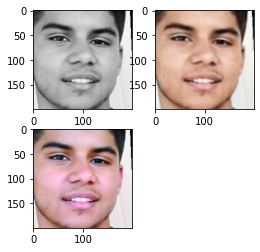

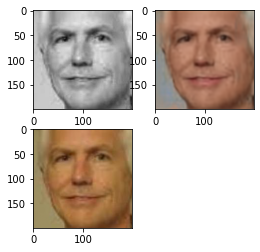

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


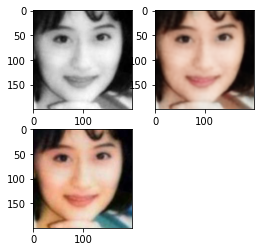

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


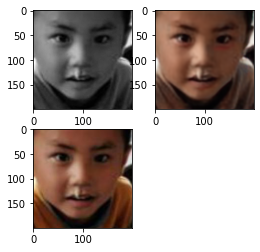

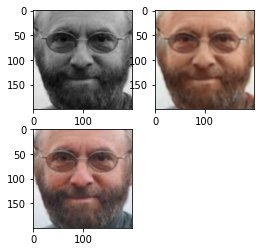

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


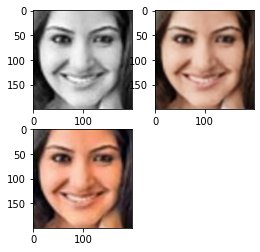

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


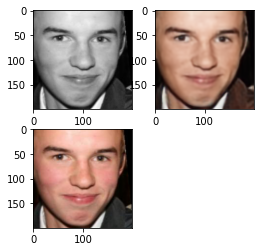

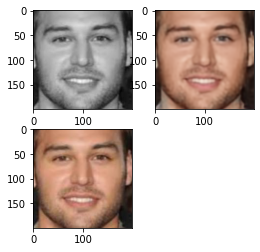

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


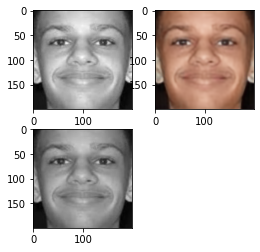

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


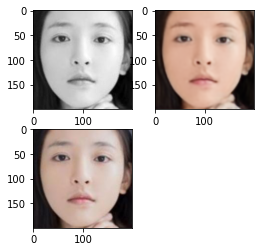

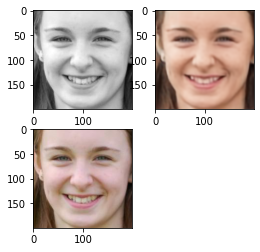

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


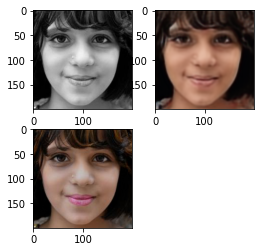

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


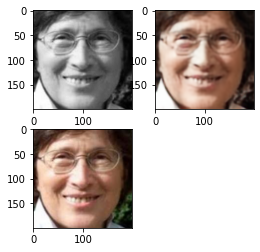

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


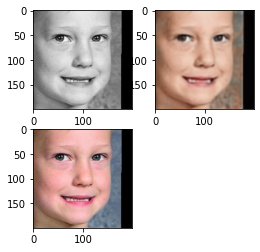

In [ ]:
a=200
pred = model.predict(dataGrayTest)
GrayTest=np.reshape(dataGrayTest,(6867-nIm,200,200))
for i in range (100):
    
  plt.figure(figsize=(4,4))
  plt.subplot(221)
  plt.imshow(GrayTest[a+i], cmap="gray")
  
  plt.subplot(223)
  plt.imshow(dataTest[a+i])
  #plt.tilte('Autoencoder Input')
  
  plt.subplot(222)
  img = pred[a+i].reshape(200,200,3)
  plt.imshow(img)
  plt.show()
  #plt.title('Autoencoder Outer ')

plt.show()
del pred

In [ ]:
def getPredictByIndex(index):
  pred = model.predict(dataGrayTest)
  img_array2 = pred[index].reshape(200,200,3)
  img_array2 = (img_array2*255.0)
  img_array2 = img_array2.astype(np.uint8)
  return Image.fromarray(img_array2, 'RGB')




Saving data6743.jpg to data6743.jpg
Saving data6753.jpg to data6753.jpg
Saving data6763.jpg to data6763.jpg
Saving data6773.jpg to data6773.jpg
Saving data6783.jpg to data6783.jpg
Saving data6832.jpg to data6832.jpg
Saving data6853.jpg to data6853.jpg
Saving data6864.jpg to data6864.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


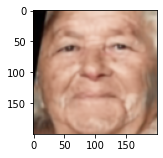

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


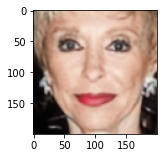

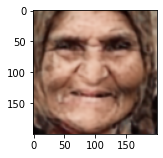

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


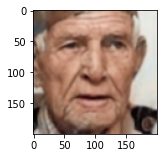

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


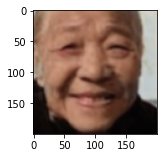

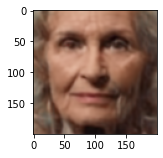

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


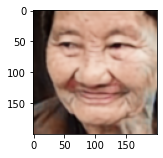

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


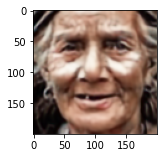

In [ ]:
from keras.preprocessing import image
from skimage.transform import rescale, resize, downscale_local_mean

uploaded=files.upload()
Test=[]
i=0
for fn in uploaded.keys():
  i=i+1
  # predicting images
  path = '/content/' + fn
  img = plt.imread(path)
  img = resize(img, (200,200))
  Test.append(rgb2gray(img))

Test=np.array(Test)  
Test=Test/255

#plt.imshow(Test[0], cmap="gray")

Test= np.reshape(Test,(i ,200,200,1))

pred = model.predict(Test)
Test=np.reshape(Test,(i,200,200))
for j in range (i):
  plt.figure(num=10,figsize=(5,5)) 
  img = pred[j].reshape(200,200,3)
  plt.subplot(221)
  plt.imshow(img)
  plt.show()
